<h1>Mono product multi period inventory problem</h1>
<p>The followin notebook shows hot to use a library for solving the mono product multi period inventory problem.
</p>
<p>This model find the optimal purchase plan that optimize the total relevant cost (TRC) given an initial inventory, minimun batch size, holding product at inventory cost, placing order cost, safety stock to keep, based in a given sales forecast and a previous purchase plan.</p>

<p>First, we are going to import the requested libraries:</p>

In [1]:
from lp_supply import inventory_solvers as pa
import matplotlib.pyplot as plt
import numpy as np

<p>In the following cell we are setting the initial parameters, they will be used as input.
</p>

In [9]:
leadtime = 5
initialInventory = 25
minpurchasequantity = 12
maxCapacity = [200, 200, 200, 200, 200, 200, 200, 30, 0, 200, 0, 200, 200, 200, 200]
purchasecost = 100
safetystock = 5.0
holdingcost = 20*0.5
#forecast = np.random.exponential(scale=5, size=20)
forecast = [5, 5, 5, 4, 4, 10, 5, 5, 5, 5, 5, 5, 50, 5, 5]
arrivals = [0, 10, 0, 0, 0, 0]

<p>Ahora creamos una instancia de la clase de Planeación agregada y pasamos los parámetros al constructor, posteriormente llamamos al metodo solve() que retornará el plan de compras y el inventario proyectado con base en el plan.</p>

In [10]:
planeacion = pa.PlaneacionAgregada(leadtime, 
                                   initialInventory, 
                                   minpurchasequantity, 
                                   purchasecost, 
                                   holdingcost, 
                                   forecast,
                                   arrivals,
                                   maxCapacity,
                                   safetystock)
plan, proyInventory, inventoryCost = planeacion.solve(verbose=False)

Error: la cantidad de arrivals no concuerda con el leadtime dado


<p>visualizar todos los resultados:</p>

In [11]:
print("Inventory plan cost = {0}".format(inventoryCost))
print('plan:\t', plan)
print('fcast:\t', forecast)
print('inv.:\t', proyInventory)

Inventory plan cost = 10.0*InventoryAt0 + 10.0*InventoryAt1 + 10.0*InventoryAt10 + 10.0*InventoryAt11 + 10.0*InventoryAt12 + 10.0*InventoryAt13 + 10.0*InventoryAt14 + 10.0*InventoryAt2 + 10.0*InventoryAt3 + 10.0*InventoryAt4 + 10.0*InventoryAt5 + 10.0*InventoryAt6 + 10.0*InventoryAt7 + 10.0*InventoryAt8 + 10.0*InventoryAt9 + 100*PlacePO0 + 100*PlacePO1 + 100*PlacePO10 + 100*PlacePO11 + 100*PlacePO12 + 100*PlacePO13 + 100*PlacePO14 + 100*PlacePO2 + 100*PlacePO3 + 100*PlacePO4 + 100*PlacePO5 + 100*PlacePO6 + 100*PlacePO7 + 100*PlacePO8 + 100*PlacePO9
plan:	 [13.0, 0.0, 0.0, 15.0, 0.0, 0.0, 35.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
fcast:	 [5, 5, 5, 4, 4, 10, 5, 5, 5, 5, 5, 5, 50, 5, 5]
inv.:	 [20.0, 25.0, 20.0, 16.0, 12.0, 15.0, 10.0, 5.0, 15.0, 10.0, 5.0, 35.0, 15.0, 10.0, 5.0]


<p>Presentar un gráfico con el plan contruido.</p>

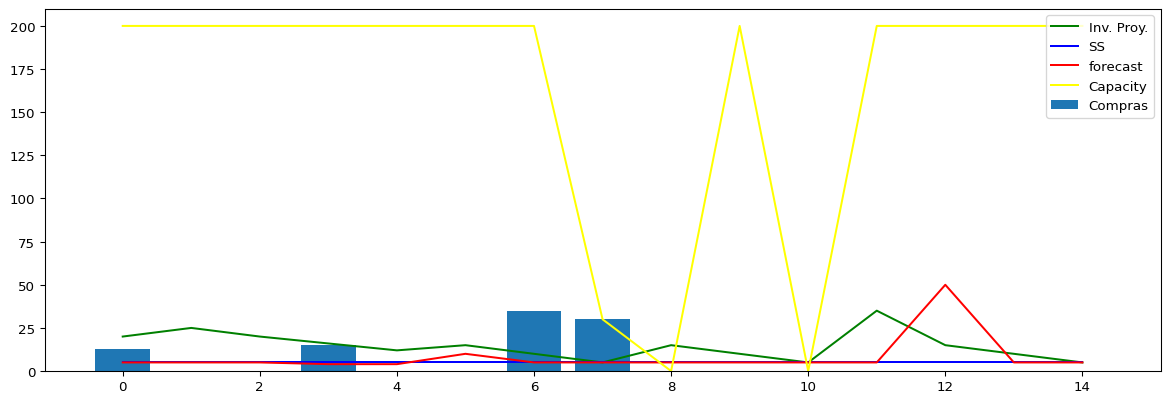

In [12]:
x = np.arange(len(forecast))
plt.figure(num=None, dpi=96, figsize=(15,5))
plt.bar(x, plan, label="Compras")
plt.plot(x, proyInventory, label="Inv. Proy.", color="green")
plt.plot(x, np.zeros(len(forecast)) + safetystock, label="SS", color="blue")
plt.plot(x, forecast, label="forecast", color="red")
plt.plot(x, maxCapacity, label="Capacity", color="yellow")
plt.legend(loc = 1)
plt.show()
# pendiente despliegue